In [93]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
from tensorflow.keras.layers import GlobalAveragePooling2D,Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import img_to_array

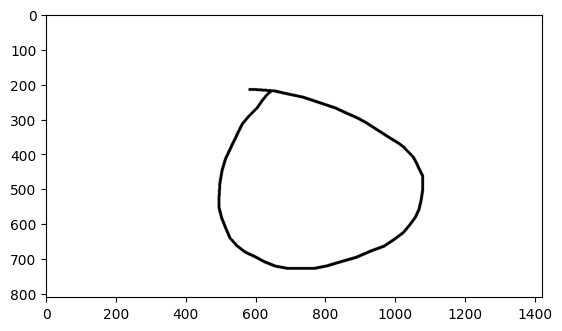

In [94]:
path = '../../00.Data/07.ML/ox/'
full_names = os.listdir(path)
labels = [each.split('.')[0] for each in full_names]
file_id = [each.split('.')[1] for each in full_names]
sample = random.choice(full_names)
image = mpimg.imread(path + sample)
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image, cmap='gray')
plt.show()

In [96]:
df = pd.DataFrame(os.listdir(path))

In [102]:
df[0]

0      o.173.png
1      o.130.png
2      x.082.png
3      x.029.png
4      o.061.png
         ...    
286    o.155.png
287    x.104.png
288    o.160.png
289    o.055.png
290    x.100.png
Name: 0, Length: 291, dtype: object

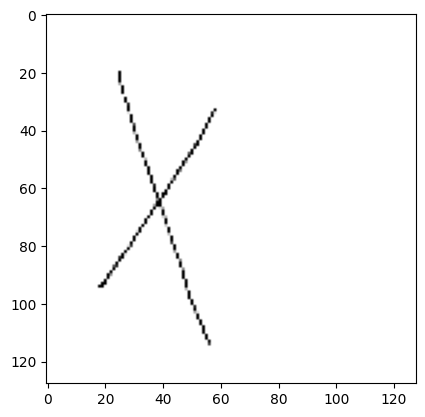

In [79]:
image = cv2.resize(image, (128, 128))
image = img_to_array(image)
image = image/255.0
plt.imshow(image, cmap='gray')
plt.show()

In [100]:
image_size = 128

model = models.Sequential([
    layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(image_size, image_size, 1)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(2, activation='softmax')
])


# 모델 컴파일
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# 모델 훈련
model.fit(X_data, y_data, epochs=10, batch_size=32)

/home/han/venv/ML/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


TypeError: 'method' object is not subscriptable

In [81]:
start_time = time.time()
hist = model.fit(x_train, y_train, epochs=100)
print('Fit time :', time.time() - start_time)

Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_7_1/Cast:0", shape=(None, 1), dtype=float32). Expected shape (None, 28, 28), but input has incompatible shape (None, 1)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 1), dtype=string)
  • training=True
  • mask=None